# Neural style transfer implementation

Let's make some cool images out of already cool paintings.

In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.applications import vgg19

root = '/home/goznalo/Programming/Python/neuralstyletransfer'

import os
for dirname, _, filenames in os.walk(root):
    for filename in filenames:
        if "checkpoints" not in dirname:
            if ".git" not in dirname:
                print(os.path.join(dirname, filename))

%matplotlib inline

/home/goznalo/Programming/Python/neuralstyletransfer/lilmodel.ipynb
/home/goznalo/Programming/Python/neuralstyletransfer/README.md
/home/goznalo/Programming/Python/neuralstyletransfer/style-imgs/The_Scream-Munch.png
/home/goznalo/Programming/Python/neuralstyletransfer/content-imgs/water_lily.jpg


In [30]:
# Image paths:

content_image = root + '/content-imgs/water_lily.jpg'
style_image = root + '/style-imgs/The_Scream-Munch.png'

# Standardize the content images to have 800px height
width, height = load_img(content_image).size
img_height = 800
img_width = int(width * img_height / height)

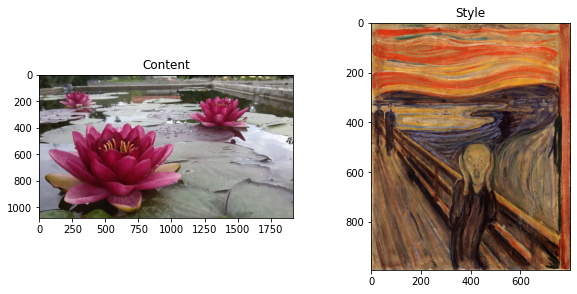

In [52]:
# Preview the images

plt.figure(figsize=(10,10))

content = load_img(content_image)
style = load_img(style_image)

plt.subplot(221, title = 'Content')
plt.imshow(content)

plt.subplot(222, title = 'Style')
plt.imshow(style)
plt.show()

### Preprocessing and utilities

We need some setup before delving in the model. This involves 

In [53]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

def deprocess_image(x):
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

### The model

We will be using the VGG19 model, with the weights borrowed from its implementation over the ImageNet database. We can see a summary of its layers below.

In [18]:
model = vgg19.VGG19(include_top=False, weights='imagenet')
model.trainable = False

In [8]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [17]:
model.get_layer('block5_conv1').output

<tf.Tensor 'block5_conv1/Identity:0' shape=(None, None, None, 512) dtype=float32>